In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
# Go Pro Hero 10 parameters
pixel_pitch_mm = 1.12e-3
sensor_width_px = 5663
focal_length_mm = 3

# Olympus TG6 parameters
# pixel_pitch_mm = 1.5e-3
# focal_len_mm = 3
# sensor_width_px = 4000

frame_delay = 1/30

dist_to_subj_mm = 5000
baseline_mm = 1000

The purpose of this notebook is to plot the error in distance estimation of an object to a stereo camera setup when the two cameras are unsynchronized. The distance away from the camera is given by the following formula: 

$$ z = \frac{fB}{xw},$$

where $f$ is the focal length, $B$ is the baseline distance, $x$ is the disparity, and $w$ is the pixel pitch (distance between centers of two adjacent pixels). The error in depth is therefore given by: 

$$ z' - z = \frac{fB}{(x + \epsilon)w} - \frac{fB}{xw},$$
where $\epsilon$ is the number of pixels the object differs from the supposed displacement from the target distance.

If we assume the object is at a fixed distance away, we can calculate this supposed displacement: 

$$ x = \frac{fB}{wz} $$

In [16]:
target_disparity_px = focal_length_mm * baseline_mm/(pixel_pitch_mm * dist_to_subj_mm)

disparity_error_px = np.linspace(0, 500, num=256)
depth_error_mm = focal_length_mm * baseline_mm/((target_disparity_px + disparity_error_px) * pixel_pitch_mm) - dist_to_subj_mm

# px -> mm -> mm per second -> 
# dist_mm / dist_to_subj = disparity_error_px / focal_length_mm
# Displacement to speed conversion
subject_speed_mps = disparity_error_px * dist_to_subj_mm/ (focal_length_mm * frame_delay * sensor_width_px)

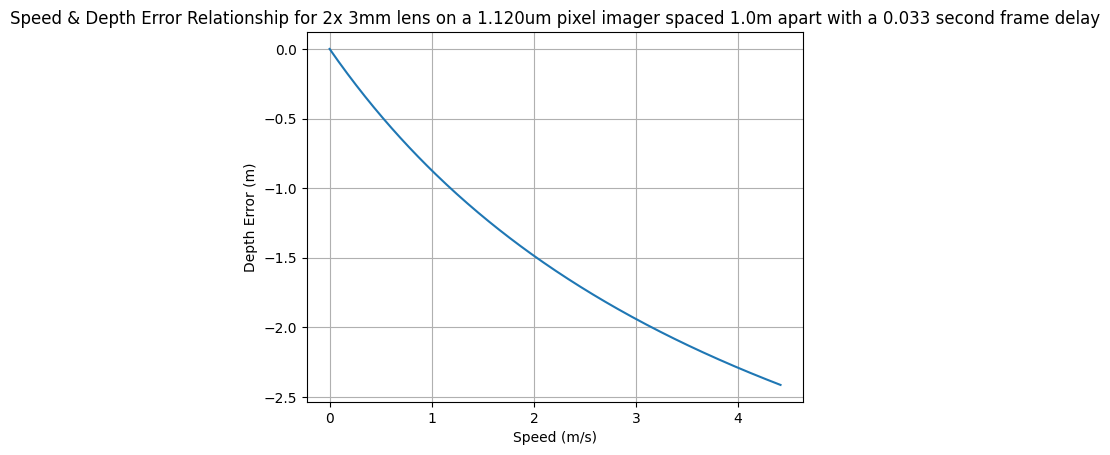

In [17]:
plt.plot(subject_speed_mps / 1e3, depth_error_mm / 1e3)
plt.xlabel("Speed (m/s)")
plt.ylabel("Depth Error (m)")
plt.title(f"Speed & Depth Error Relationship for 2x {focal_length_mm}mm lens on a {pixel_pitch_mm * 1e3:.3f}um pixel imager spaced {baseline_mm/1000}m apart with a {frame_delay:.3f} second frame delay")
plt.grid()